# 🧠 Brain Tumor Classification - ResNet
# Author: Lincoln Dibler | Model: ResNet | Purpose: Train and evaluate CNN with modular pipeline


# 1.) Imports

In [ ]:
BASE_DIR = '/content/drive/MyDrive/BrainTumorClassification'
TRAIN_DIR = f'{BASE_DIR}/data/Training'
TEST_DIR = f'{BASE_DIR}/data/Testing'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/BrainTumorClassification')

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input

from utils import count_images_per_class, plot_random_images_per_class, create_generators
from models import build_resnet_model, train_model
from evaluation import ModelEvaluator, gradcam_samples_by_class
from utils import save_model_to_drive, load_model_from_drive
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_pre
from tensorflow.keras.applications import ResNet50



# 2.) Data Inspections

meningioma: 1339 images
glioma: 1321 images
notumor: 1595 images
pituitary: 1457 images


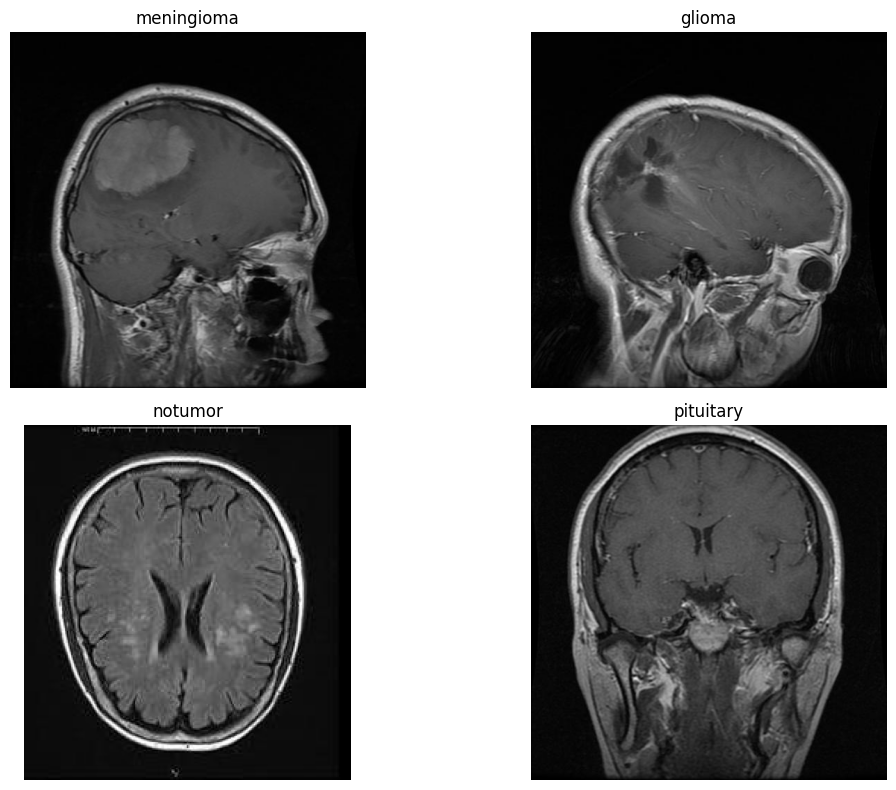

In [ ]:
count_images_per_class(TRAIN_DIR)
plot_random_images_per_class(TRAIN_DIR)

# 3.) Generator Setup

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

train_gen, val_gen, test_gen = create_generators(
    train_dir=TRAIN_DIR,
    test_dir=TEST_DIR,
    img_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    preprocessing=resnet_pre
)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


# 4.) Build and Train Model

In [ ]:
model = build_resnet_model(img_size=(224, 224))
model, history = train_model(model, train_gen, val_gen, test_gen, epochs=EPOCHS)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1134s 8s/step - accuracy: 0.3310 - loss: 1.5854 - val_accuracy: 0.5776 - val_loss: 1.1231
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1091s 8s/step - accuracy: 0.6610 - loss: 0.8414 - val_accuracy: 0.6810 - val_loss: 0.9454
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1093s 8s/step - accuracy: 0.7483 - loss: 0.6340 - val_accuracy: 0.7029 - val_loss: 0.8594
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1081s 8s/step - accuracy: 0.8254 - loss: 0.4902 - val_accuracy: 0.7239 - val_loss: 0.7899
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1076s 8s/step - accuracy: 0.8269 - loss: 0.4650 - val_accuracy: 0.7476 - val_loss: 0.7409
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1081s 8s/step - accuracy: 0.8542 - loss: 0.4046 - val_accuracy: 0.7423 - val_loss: 0.7073
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1122s 8s/step - accuracy: 0.8623 - loss: 0.3783 - val_accuracy: 0.7476 - val_loss: 0.6767
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 1085s 8s/step - accuracy: 0.8638 - loss: 0.3881 - 

# 5.) Save Model

In [ ]:
save_model_to_drive(model, model_name='resnet_model')

✅ Model saved to Drive at: /content/drive/MyDrive/BrainTumorClassification/saved_models/mobilenet_model.keras


# 6.) Evaluate Results

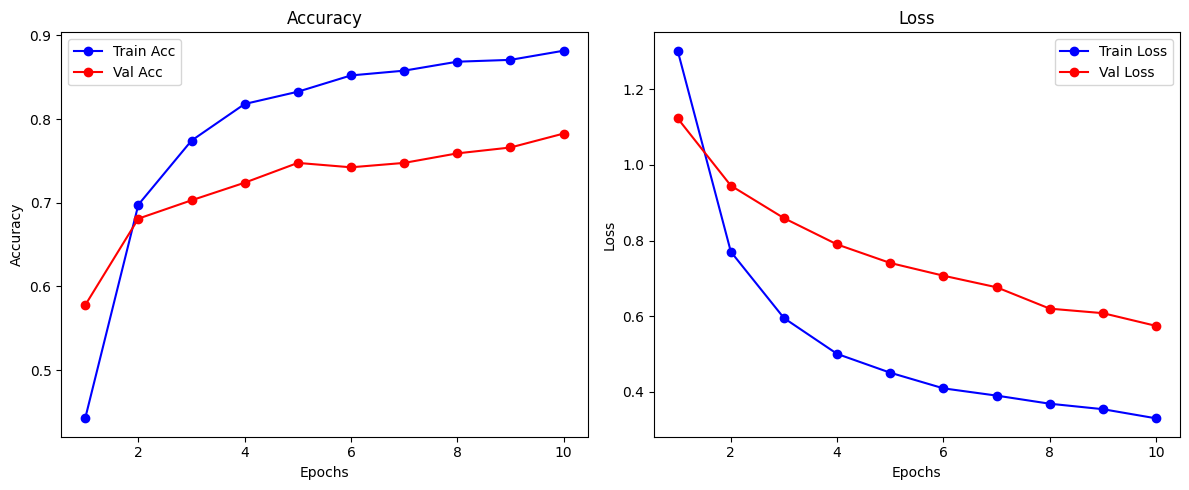

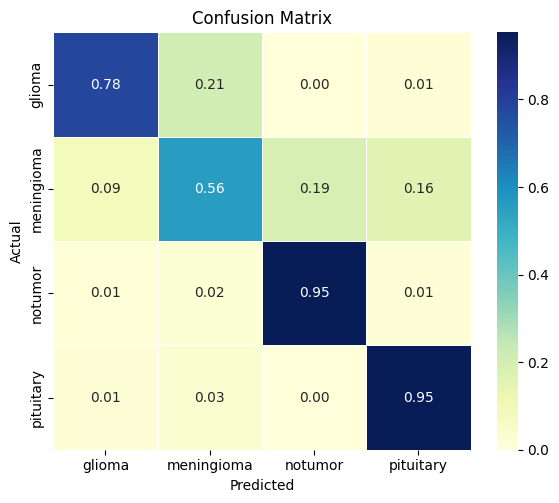

              precision    recall  f1-score   support

      glioma       0.87      0.78      0.82       300
  meningioma       0.68      0.56      0.62       306
     notumor       0.87      0.95      0.91       405
   pituitary       0.83      0.95      0.89       300

    accuracy                           0.82      1311
   macro avg       0.81      0.81      0.81      1311
weighted avg       0.82      0.82      0.82      1311



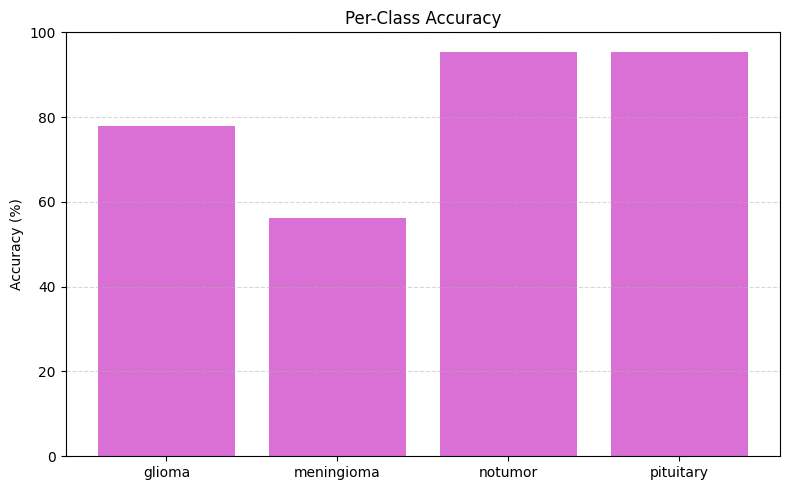

In [ ]:
class_names = list(test_gen.class_indices.keys())

evaluator = ModelEvaluator(
    model=model,
    history=history,
    test_gen=test_gen,
    class_names=class_names,
    input_size=IMG_SIZE,
    preprocess_fn=None,
    last_conv_layer='Conv_1'
)

evaluator.plot_training_curves()
evaluator.plot_confusion_matrix()
evaluator.show_classification_report()
evaluator.plot_per_class_accuracy()


# 7.) Grad-Cam Sampling

In [ ]:
gradcam_samples_by_class(evaluator, root_dir=TEST_DIR, max_examples=1)

NameError: name 'gradcam_samples_by_class' is not defined